In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
df = pd.read_csv('diabetes.csv') #taking input from csv file
df.head(6)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0


In [3]:
df.info() # checking for null and checking info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# also checking null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [85]:
df.describe().transpose() # transpose for better view

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Data Analysis and cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# clearing zeros form ('Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI'). 0 in these doesn't make any sense
col = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']

In [8]:
for i in col:
    df[i].replace(0, df[i].mean(), inplace = True)

In [86]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# EDA AND DATA VISUALIZATION

In [92]:
def hist_count(column, data):
    if column in data:
        f, axes = plt.subplots(1,1, figsize =(15,5))
        sns.countplot(x=column, data = data)
        plt.xticks(rotation = 90)
        plt.suptitle(column, fontsize=20)
        plt.show()
    plt.show()

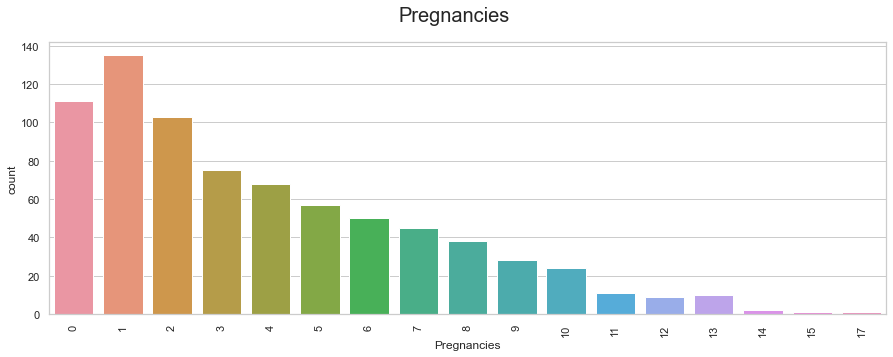

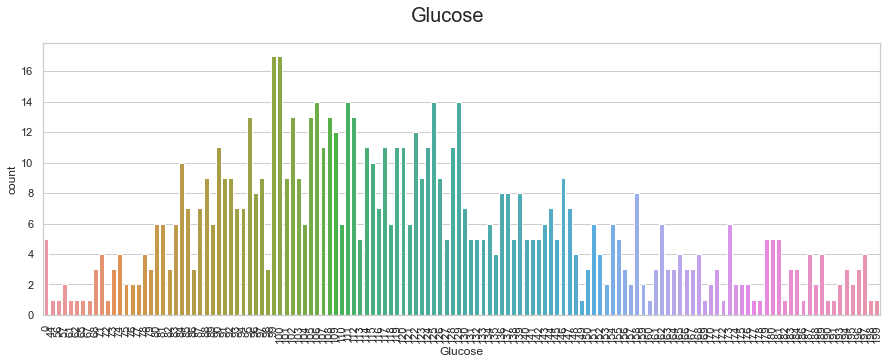

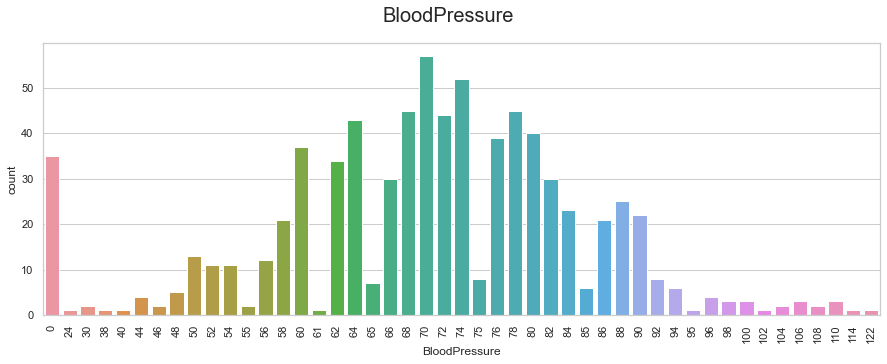

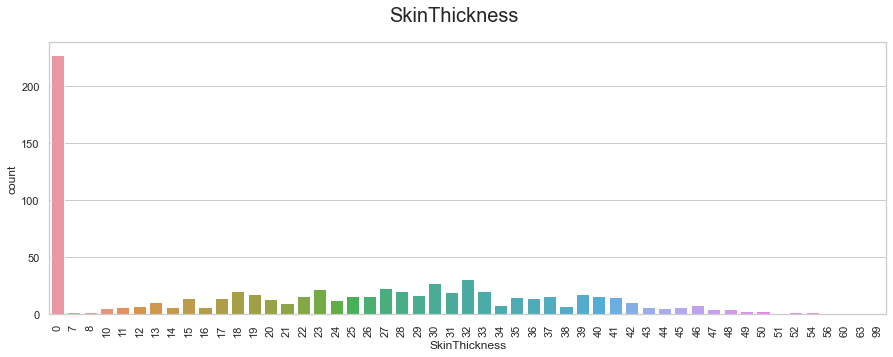

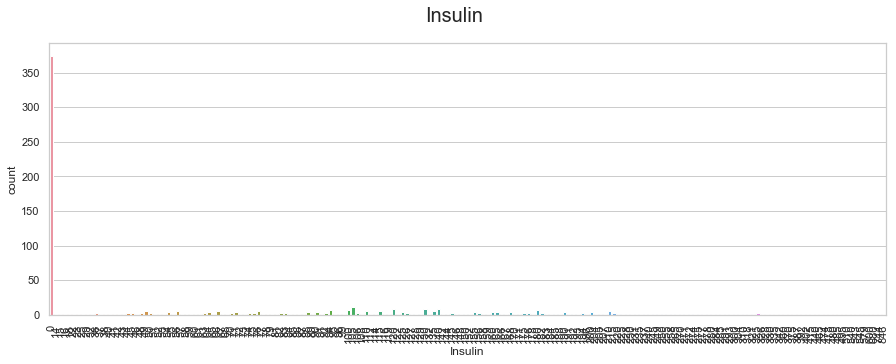

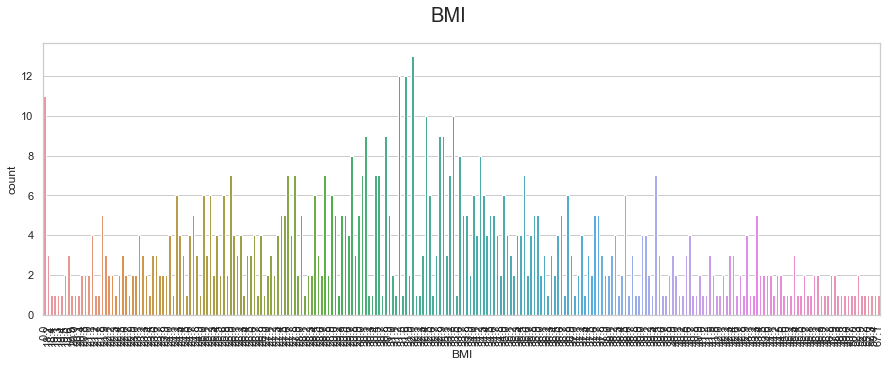

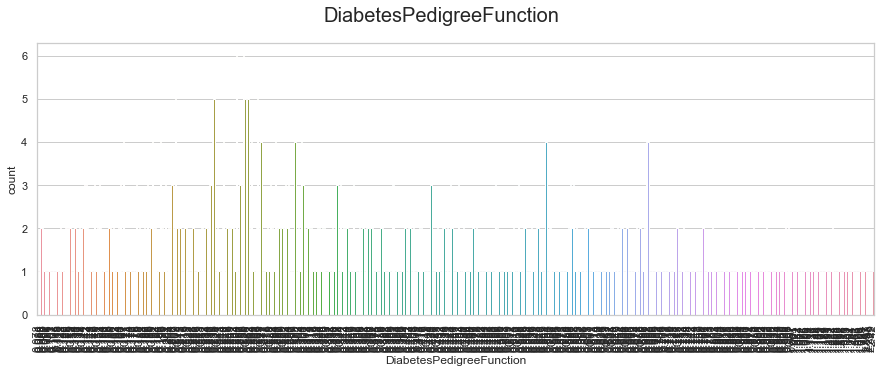

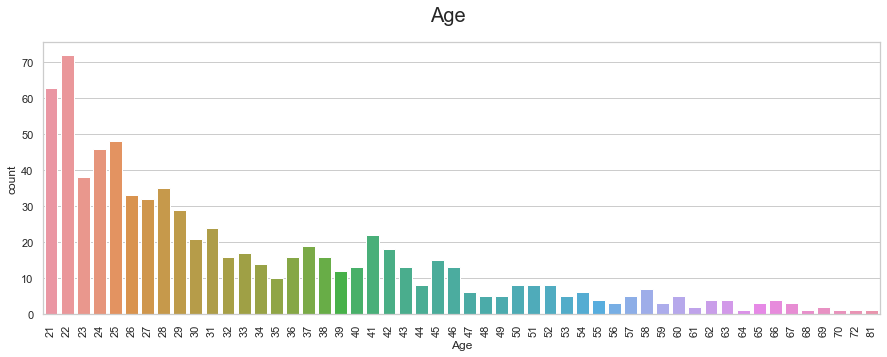

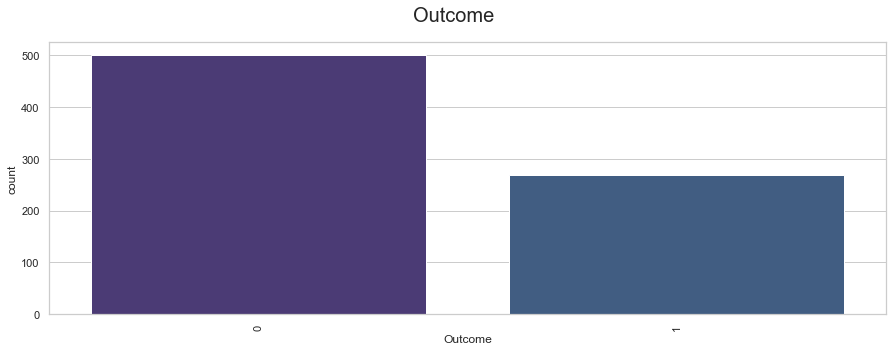

In [93]:
for column in df.columns:
    hist_count(column, df)

In [12]:
sns.set(style = "whitegrid", palette = "viridis")

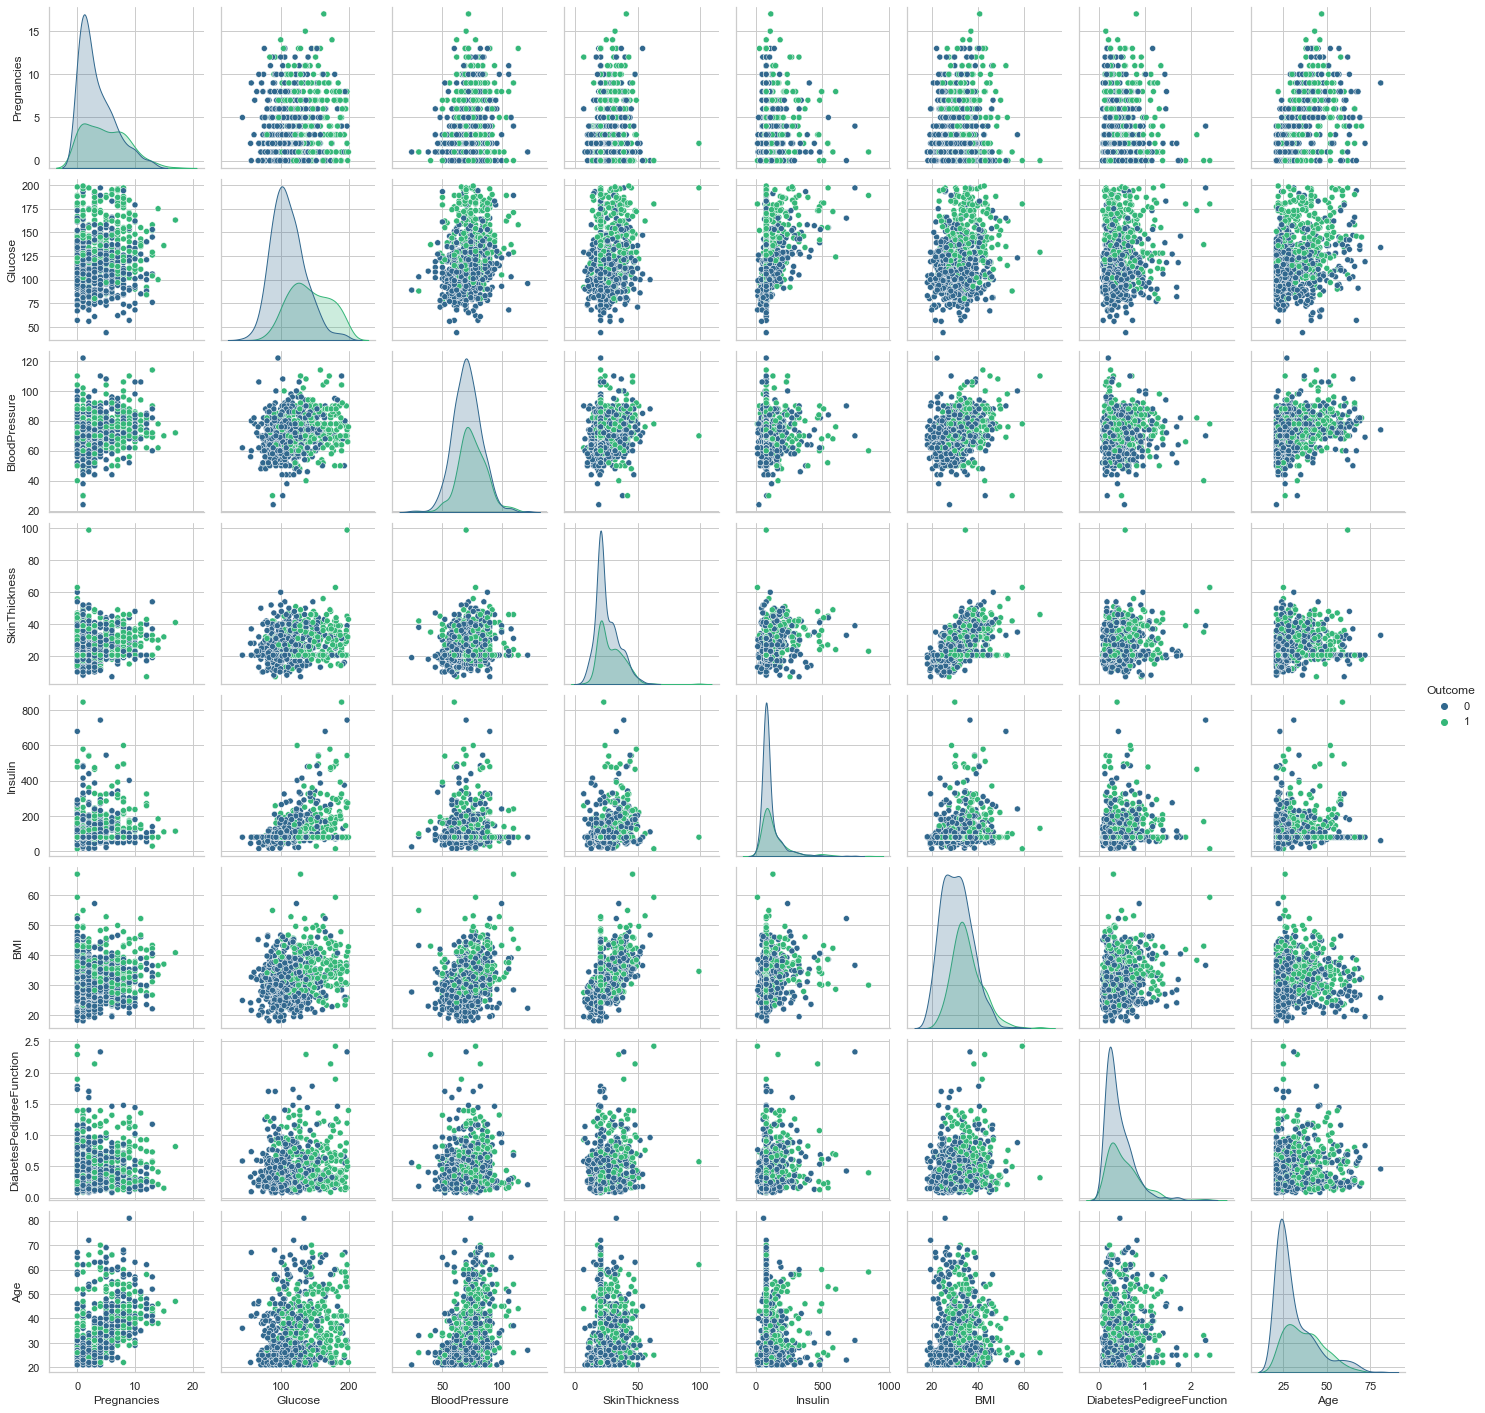

In [13]:
sns.pairplot(df, hue='Outcome', palette = "viridis"); #EDA

<AxesSubplot:>

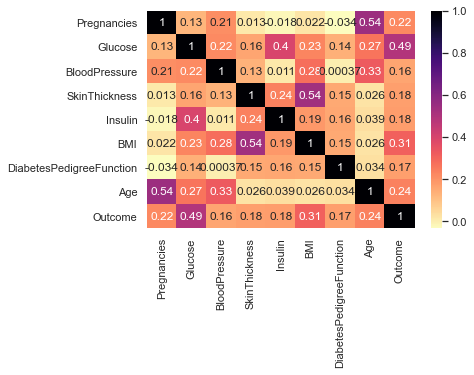

In [14]:
sns.heatmap(df.corr(), annot=True, cmap = "magma_r") #HEATMAP

# Feature selection

In [15]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [16]:
x = df.drop('Outcome', axis=1) #indi
y= df['Outcome'] #dep

# POLYNOMIAL FEATURES

In [17]:
from sklearn.preprocessing import PolynomialFeatures

In [18]:
poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly.fit_transform(x) 

In [19]:
poly_features[0]

array([6.00000000e+00, 1.48000000e+02, 7.20000000e+01, 3.50000000e+01,
       7.97994792e+01, 3.36000000e+01, 6.27000000e-01, 5.00000000e+01,
       3.60000000e+01, 8.88000000e+02, 4.32000000e+02, 2.10000000e+02,
       4.78796875e+02, 2.01600000e+02, 3.76200000e+00, 3.00000000e+02,
       2.19040000e+04, 1.06560000e+04, 5.18000000e+03, 1.18103229e+04,
       4.97280000e+03, 9.27960000e+01, 7.40000000e+03, 5.18400000e+03,
       2.52000000e+03, 5.74556250e+03, 2.41920000e+03, 4.51440000e+01,
       3.60000000e+03, 1.22500000e+03, 2.79298177e+03, 1.17600000e+03,
       2.19450000e+01, 1.75000000e+03, 6.36795688e+03, 2.68126250e+03,
       5.00342734e+01, 3.98997396e+03, 1.12896000e+03, 2.10672000e+01,
       1.68000000e+03, 3.93129000e-01, 3.13500000e+01, 2.50000000e+03,
       2.16000000e+02, 5.32800000e+03, 2.59200000e+03, 1.26000000e+03,
       2.87278125e+03, 1.20960000e+03, 2.25720000e+01, 1.80000000e+03,
       1.31424000e+05, 6.39360000e+04, 3.10800000e+04, 7.08619375e+04,
      

In [20]:
len(poly_features[0])

164

# TRAIN TEST SPLIT

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.3, random_state=242)

In [22]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33


# SCALING

In [23]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() # standard scaling the datas
pd.DataFrame(x_train).describe() # calculating the statistics and show the data frame

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000
mean,3.944134,122.928647,72.339516,26.642875,117.021711,32.462846,0.488363,34.005587
std,3.451239,31.028290,12.037288,9.595898,90.062788,7.107160,0.353067,12.124893
min,0.000000,44.000000,30.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,100.000000,64.000000,20.536458,79.799479,27.300000,0.245000,24.000000
50%,3.000000,119.000000,72.000000,23.000000,79.799479,32.000000,0.380000,30.000000
75%,6.000000,143.000000,80.000000,32.000000,125.000000,36.900000,0.658000,41.000000
max,17.000000,199.000000,114.000000,63.000000,846.000000,67.100000,2.420000,81.000000


In [24]:
#Compute the mean and std to be used for later scaling
scaler.fit(x_train) 
#Perform standardization by centering and scaling
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [25]:
pd.DataFrame(x_train).describe()

,0,1,2,3,4,5,6,7
count,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02
mean,3.948838e-17,1.347980e-16,2.981269e-16,3.317489e-16,-2.749714e-17,5.635752e-17,1.349014e-16,-1.393464e-16
std,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00
min,-1.143882e+00,-2.546136e+00,-3.520643e+00,-2.048916e+00,-1.144954e+00,-2.008699e+00,-1.163365e+00,-1.073635e+00
25%,-8.538612e-01,-7.396484e-01,-6.934529e-01,-6.369503e-01,-4.136774e-01,-7.271061e-01,-6.899262e-01,-8.259797e-01
50%,-2.738189e-01,-1.267331e-01,-2.823169e-02,-3.799823e-01,-4.136774e-01,-6.518456e-02,-3.072058e-01,-3.306686e-01
75%,5.962446e-01,6.474758e-01,6.369895e-01,5.587929e-01,8.866845e-02,6.249039e-01,4.809147e-01,5.774018e-01
max,3.786477e+00,2.453963e+00,3.464180e+00,3.792352e+00,8.101659e+00,4.878102e+00,5.476125e+00,3.879476e+00


In [26]:
x_train[0]

array([-0.27381886,  1.13135636, -0.69345287, -1.42306589,  3.00046249,
       -0.17785206, -0.54817786, -0.82597973])

# MODEL TESTING

In [27]:
# importing common libraries
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

### logistic regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
log_model = LogisticRegression(max_iter = 200)

In [30]:
log_model.fit(x_train, y_train)

LogisticRegression(max_iter=200)

In [31]:
log_pred = log_model.predict(x_test)

In [32]:
print(confusion_matrix(y_test, log_pred))

[[152  15]
 [ 26  38]]


In [33]:
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       167
           1       0.72      0.59      0.65        64

    accuracy                           0.82       231
   macro avg       0.79      0.75      0.77       231
weighted avg       0.82      0.82      0.82       231



In [34]:
accuracy_logisticRegression = accuracy_score(y_test, log_pred)

In [35]:
accuracy_logisticRegression

0.8225108225108225

## Random forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rfc_model = RandomForestClassifier(n_estimators = 500)
rfc_model.fit(x_train, y_train)
rfc_pred = rfc_model.predict(x_test)
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       167
           1       0.62      0.69      0.65        64

    accuracy                           0.80       231
   macro avg       0.75      0.76      0.75       231
weighted avg       0.80      0.80      0.80       231



In [38]:
rfc_accuracy = accuracy_score(y_test, rfc_pred)
rfc_accuracy

0.7965367965367965

## k-Nearest Neighbors

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn_model = KNeighborsClassifier(n_neighbors = 10)
knn_model.fit(x_train, y_train)
knn_pred = knn_model.predict(x_test)
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       167
           1       0.64      0.55      0.59        64

    accuracy                           0.79       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.78      0.79      0.78       231



In [41]:
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_accuracy

0.7878787878787878

## support vector classifier

In [42]:
from sklearn.svm import SVC

In [43]:
svc_model = SVC()
svc_model.fit(x_train, y_train)
svc_pred = svc_model.predict(x_test)
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       167
           1       0.64      0.59      0.62        64

    accuracy                           0.80       231
   macro avg       0.75      0.73      0.74       231
weighted avg       0.79      0.80      0.79       231



In [44]:
svc_accuracy = accuracy_score(y_test, svc_pred)
svc_accuracy

0.7965367965367965

## Decision Tree 

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
dtc_model = DecisionTreeClassifier()
dtc_model.fit(x_train, y_train)
dtc_pred = dtc_model.predict(x_test)
print(classification_report(y_test, dtc_pred))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80       167
           1       0.49      0.61      0.55        64

    accuracy                           0.72       231
   macro avg       0.66      0.68      0.67       231
weighted avg       0.74      0.72      0.73       231



In [47]:
dtc_accuracy = accuracy_score(y_test, dtc_pred)
dtc_accuracy

0.7186147186147186

## GRID SEARCH CV

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
SVC().get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [50]:
params = {
'C': [0.01, 0.1, 1, 10, 100],
'gamma': [0.01, 0.1, 1, 10, 100],
'kernel': ['linear', 'rbf']
}

In [51]:
grid = GridSearchCV(SVC(), params, verbose=3)

In [52]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ..............C=0.01, gamma=0.01, kernel=linear; total time=   0.0s
[CV 2/5] END ..............C=0.01, gamma=0.01, kernel=linear; total time=   0.0s
[CV 3/5] END ..............C=0.01, gamma=0.01, kernel=linear; total time=   0.0s
[CV 4/5] END ..............C=0.01, gamma=0.01, kernel=linear; total time=   0.0s
[CV 5/5] END ..............C=0.01, gamma=0.01, kernel=linear; total time=   0.0s
[CV 1/5] END .................C=0.01, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=0.01, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 3/5] END .................C=0.01, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 4/5] END .................C=0.01, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 5/5] END .................C=0.01, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 1/5] END ...............C=0.01, gamma=0.1, kernel=linear; total time=   0.0s
[CV 2/5] END ...............C=0.01, gamma=0.1, 

[CV 1/5] END ....................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV 2/5] END ....................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV 3/5] END ....................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV 4/5] END ....................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV 5/5] END ....................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV 1/5] END .......................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .......................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .......................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .......................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .......................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=1, gamma=10, kernel=linear; total time=   0.0s
[CV 2/5] END ...................C=1, gamma=10, kernel=linear; total time=   0.0s
[CV 3/5] END ...............

[CV 4/5] END ..................C=100, gamma=1, kernel=linear; total time=   0.1s
[CV 5/5] END ..................C=100, gamma=1, kernel=linear; total time=   0.0s
[CV 1/5] END .....................C=100, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=100, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=100, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=100, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=100, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END .................C=100, gamma=10, kernel=linear; total time=   0.0s
[CV 2/5] END .................C=100, gamma=10, kernel=linear; total time=   0.0s
[CV 3/5] END .................C=100, gamma=10, kernel=linear; total time=   0.1s
[CV 4/5] END .................C=100, gamma=10, kernel=linear; total time=   0.1s
[CV 5/5] END .................C=100, gamma=10, kernel=linear; total time=   0.1s
[CV 1/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf']},
             verbose=3)

In [53]:
grid.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [54]:
grid_pred = grid.predict(x_test)

In [55]:
print(confusion_matrix(y_test, grid_pred))

[[152  15]
 [ 30  34]]


In [56]:
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       167
           1       0.69      0.53      0.60        64

    accuracy                           0.81       231
   macro avg       0.76      0.72      0.74       231
weighted avg       0.80      0.81      0.80       231



In [57]:
grid_accuracy = accuracy_score(y_test, grid_pred)
grid_accuracy

0.8051948051948052

# Linear Discriminant Analysis

In [58]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [59]:
lda_model = LinearDiscriminantAnalysis()

In [60]:
lda_model.fit(x_train, y_train)
lda_pred = lda_model.predict(x_test)
print(classification_report(y_test, lda_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.89       167
           1       0.74      0.58      0.65        64

    accuracy                           0.83       231
   macro avg       0.80      0.75      0.77       231
weighted avg       0.82      0.83      0.82       231



In [61]:
lda_accuracy = accuracy_score(y_test, lda_pred)
lda_accuracy

0.8268398268398268

## ANN MODEL

In [62]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [63]:
x_train.shape

(537, 8)

In [64]:
model = Sequential()
#input layer
model.add(Dense(units=8, activation='relu'))
#1st hidden layer
model.add(Dense(units=15, activation='relu'))
#2nd hidden layer
model.add(Dense(units=1, activation='sigmoid'))
# final layer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [65]:
model.fit(
x=x_train,
y=y_train,
epochs=600,
validation_data=(x_test, y_test),
verbose=1
)

Epoch 1/600
17/17 [==============================] - 2s 14ms/step - loss: 0.6431 - accuracy: 0.6331 - val_loss: 0.5691 - val_accuracy: 0.7446
Epoch 2/600
17/17 [==============================] - 0s 2ms/step - loss: 0.6208 - accuracy: 0.6462 - val_loss: 0.5580 - val_accuracy: 0.7532
Epoch 3/600
17/17 [==============================] - 0s 2ms/step - loss: 0.6029 - accuracy: 0.6648 - val_loss: 0.5457 - val_accuracy: 0.7576
Epoch 4/600
17/17 [==============================] - 0s 2ms/step - loss: 0.5869 - accuracy: 0.6834 - val_loss: 0.5344 - val_accuracy: 0.7619
Epoch 5/600
17/17 [==============================] - 0s 2ms/step - loss: 0.5727 - accuracy: 0.6890 - val_loss: 0.5243 - val_accuracy: 0.7619
Epoch 6/600
17/17 [==============================] - 0s 2ms/step - loss: 0.5619 - accuracy: 0.7039 - val_loss: 0.5138 - val_accuracy: 0.7662
Epoch 7/600
17/17 [==============================] - ETA: 0s - loss: 0.5672 - accuracy: 0.81 - 0s 2ms/step - loss: 0.5514 - accuracy: 0.7207 - val_loss: 

17/17 [==============================] - 0s 2ms/step - loss: 0.4279 - accuracy: 0.7877 - val_loss: 0.4422 - val_accuracy: 0.7965
Epoch 58/600
17/17 [==============================] - 0s 2ms/step - loss: 0.4268 - accuracy: 0.7858 - val_loss: 0.4442 - val_accuracy: 0.7965
Epoch 59/600
17/17 [==============================] - 0s 2ms/step - loss: 0.4257 - accuracy: 0.7877 - val_loss: 0.4442 - val_accuracy: 0.7922
Epoch 60/600
17/17 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.7858 - val_loss: 0.4449 - val_accuracy: 0.7965
Epoch 61/600
17/17 [==============================] - 0s 2ms/step - loss: 0.4242 - accuracy: 0.7858 - val_loss: 0.4454 - val_accuracy: 0.7965
Epoch 62/600
17/17 [==============================] - 0s 2ms/step - loss: 0.4233 - accuracy: 0.7858 - val_loss: 0.4455 - val_accuracy: 0.7965
Epoch 63/600
17/17 [==============================] - 0s 2ms/step - loss: 0.4227 - accuracy: 0.7840 - val_loss: 0.4459 - val_accuracy: 0.7965
Epoch 64/600
17/17 

17/17 [==============================] - 0s 2ms/step - loss: 0.3932 - accuracy: 0.8101 - val_loss: 0.4741 - val_accuracy: 0.7922
Epoch 115/600
17/17 [==============================] - 0s 2ms/step - loss: 0.3929 - accuracy: 0.8082 - val_loss: 0.4742 - val_accuracy: 0.7922
Epoch 116/600
17/17 [==============================] - 0s 2ms/step - loss: 0.3928 - accuracy: 0.8045 - val_loss: 0.4757 - val_accuracy: 0.7922
Epoch 117/600
17/17 [==============================] - 0s 2ms/step - loss: 0.3921 - accuracy: 0.8063 - val_loss: 0.4755 - val_accuracy: 0.7922
Epoch 118/600
17/17 [==============================] - 0s 2ms/step - loss: 0.3917 - accuracy: 0.8045 - val_loss: 0.4764 - val_accuracy: 0.7922
Epoch 119/600
17/17 [==============================] - 0s 2ms/step - loss: 0.3912 - accuracy: 0.8045 - val_loss: 0.4779 - val_accuracy: 0.7965
Epoch 120/600
17/17 [==============================] - 0s 2ms/step - loss: 0.3906 - accuracy: 0.8045 - val_loss: 0.4787 - val_accuracy: 0.7965
Epoch 121/600

17/17 [==============================] - 0s 2ms/step - loss: 0.3698 - accuracy: 0.8119 - val_loss: 0.4948 - val_accuracy: 0.7965
Epoch 172/600
17/17 [==============================] - 0s 2ms/step - loss: 0.3696 - accuracy: 0.8156 - val_loss: 0.4969 - val_accuracy: 0.7922
Epoch 173/600
17/17 [==============================] - 0s 2ms/step - loss: 0.3691 - accuracy: 0.8138 - val_loss: 0.4956 - val_accuracy: 0.7965
Epoch 174/600
17/17 [==============================] - 0s 2ms/step - loss: 0.3679 - accuracy: 0.8156 - val_loss: 0.4964 - val_accuracy: 0.7965
Epoch 175/600
17/17 [==============================] - 0s 2ms/step - loss: 0.3679 - accuracy: 0.8175 - val_loss: 0.4971 - val_accuracy: 0.8009
Epoch 176/600
17/17 [==============================] - 0s 2ms/step - loss: 0.3667 - accuracy: 0.8175 - val_loss: 0.4987 - val_accuracy: 0.8009
Epoch 177/600
17/17 [==============================] - 0s 2ms/step - loss: 0.3662 - accuracy: 0.8156 - val_loss: 0.5004 - val_accuracy: 0.7922
Epoch 178/600

17/17 [==============================] - 0s 2ms/step - loss: 0.3324 - accuracy: 0.8436 - val_loss: 0.5441 - val_accuracy: 0.7706
Epoch 228/600
17/17 [==============================] - 0s 2ms/step - loss: 0.3319 - accuracy: 0.8417 - val_loss: 0.5437 - val_accuracy: 0.7706
Epoch 229/600
17/17 [==============================] - 0s 2ms/step - loss: 0.3318 - accuracy: 0.8436 - val_loss: 0.5471 - val_accuracy: 0.7706
Epoch 230/600
17/17 [==============================] - 0s 2ms/step - loss: 0.3307 - accuracy: 0.8454 - val_loss: 0.5429 - val_accuracy: 0.7706
Epoch 231/600
17/17 [==============================] - 0s 2ms/step - loss: 0.3300 - accuracy: 0.8473 - val_loss: 0.5472 - val_accuracy: 0.7706
Epoch 232/600
17/17 [==============================] - ETA: 0s - loss: 0.2076 - accuracy: 0.93 - 0s 2ms/step - loss: 0.3303 - accuracy: 0.8454 - val_loss: 0.5458 - val_accuracy: 0.7749
Epoch 233/600
17/17 [==============================] - 0s 2ms/step - loss: 0.3297 - accuracy: 0.8436 - val_loss: 0

17/17 [==============================] - 0s 2ms/step - loss: 0.3098 - accuracy: 0.8603 - val_loss: 0.5903 - val_accuracy: 0.7662
Epoch 284/600
17/17 [==============================] - 0s 2ms/step - loss: 0.3095 - accuracy: 0.8641 - val_loss: 0.5921 - val_accuracy: 0.7619
Epoch 285/600
17/17 [==============================] - 0s 2ms/step - loss: 0.3097 - accuracy: 0.8585 - val_loss: 0.5897 - val_accuracy: 0.7619
Epoch 286/600
17/17 [==============================] - 0s 2ms/step - loss: 0.3088 - accuracy: 0.8585 - val_loss: 0.5927 - val_accuracy: 0.7662
Epoch 287/600
17/17 [==============================] - 0s 2ms/step - loss: 0.3083 - accuracy: 0.8603 - val_loss: 0.5951 - val_accuracy: 0.7662
Epoch 288/600
17/17 [==============================] - 0s 2ms/step - loss: 0.3086 - accuracy: 0.8603 - val_loss: 0.5936 - val_accuracy: 0.7662
Epoch 289/600
17/17 [==============================] - ETA: 0s - loss: 0.3580 - accuracy: 0.84 - 0s 2ms/step - loss: 0.3075 - accuracy: 0.8622 - val_loss: 0

17/17 [==============================] - 0s 2ms/step - loss: 0.2950 - accuracy: 0.8752 - val_loss: 0.6234 - val_accuracy: 0.7749
Epoch 340/600
17/17 [==============================] - 0s 2ms/step - loss: 0.2943 - accuracy: 0.8715 - val_loss: 0.6220 - val_accuracy: 0.7749
Epoch 341/600
17/17 [==============================] - 0s 2ms/step - loss: 0.2942 - accuracy: 0.8715 - val_loss: 0.6242 - val_accuracy: 0.7749
Epoch 342/600
17/17 [==============================] - 0s 2ms/step - loss: 0.2939 - accuracy: 0.8696 - val_loss: 0.6253 - val_accuracy: 0.7749
Epoch 343/600
17/17 [==============================] - ETA: 0s - loss: 0.1518 - accuracy: 0.93 - 0s 2ms/step - loss: 0.2938 - accuracy: 0.8771 - val_loss: 0.6191 - val_accuracy: 0.7749
Epoch 344/600
17/17 [==============================] - 0s 2ms/step - loss: 0.2932 - accuracy: 0.8734 - val_loss: 0.6244 - val_accuracy: 0.7749
Epoch 345/600
17/17 [==============================] - 0s 2ms/step - loss: 0.2932 - accuracy: 0.8752 - val_loss: 0

17/17 [==============================] - 0s 2ms/step - loss: 0.2832 - accuracy: 0.8715 - val_loss: 0.6507 - val_accuracy: 0.7749
Epoch 396/600
17/17 [==============================] - 0s 2ms/step - loss: 0.2830 - accuracy: 0.8715 - val_loss: 0.6493 - val_accuracy: 0.7749
Epoch 397/600
17/17 [==============================] - 0s 2ms/step - loss: 0.2829 - accuracy: 0.8696 - val_loss: 0.6500 - val_accuracy: 0.7706
Epoch 398/600
17/17 [==============================] - 0s 2ms/step - loss: 0.2825 - accuracy: 0.8771 - val_loss: 0.6526 - val_accuracy: 0.7706
Epoch 399/600
17/17 [==============================] - 0s 2ms/step - loss: 0.2824 - accuracy: 0.8734 - val_loss: 0.6505 - val_accuracy: 0.7706
Epoch 400/600
17/17 [==============================] - 0s 2ms/step - loss: 0.2825 - accuracy: 0.8696 - val_loss: 0.6526 - val_accuracy: 0.7662
Epoch 401/600
17/17 [==============================] - 0s 2ms/step - loss: 0.2820 - accuracy: 0.8696 - val_loss: 0.6527 - val_accuracy: 0.7662
Epoch 402/600

Epoch 451/600
17/17 [==============================] - 0s 2ms/step - loss: 0.2749 - accuracy: 0.8734 - val_loss: 0.6778 - val_accuracy: 0.7619
Epoch 452/600
17/17 [==============================] - 0s 2ms/step - loss: 0.2738 - accuracy: 0.8752 - val_loss: 0.6762 - val_accuracy: 0.7662
Epoch 453/600
17/17 [==============================] - 0s 2ms/step - loss: 0.2739 - accuracy: 0.8752 - val_loss: 0.6767 - val_accuracy: 0.7662
Epoch 454/600
17/17 [==============================] - 0s 2ms/step - loss: 0.2747 - accuracy: 0.8734 - val_loss: 0.6789 - val_accuracy: 0.7662
Epoch 455/600
17/17 [==============================] - 0s 2ms/step - loss: 0.2734 - accuracy: 0.8734 - val_loss: 0.6795 - val_accuracy: 0.7662
Epoch 456/600
17/17 [==============================] - 0s 2ms/step - loss: 0.2734 - accuracy: 0.8771 - val_loss: 0.6775 - val_accuracy: 0.7662
Epoch 457/600
17/17 [==============================] - 0s 2ms/step - loss: 0.2734 - accuracy: 0.8734 - val_loss: 0.6823 - val_accuracy: 0.7619

Epoch 507/600
17/17 [==============================] - 0s 2ms/step - loss: 0.2661 - accuracy: 0.8790 - val_loss: 0.7036 - val_accuracy: 0.7619
Epoch 508/600
17/17 [==============================] - 0s 2ms/step - loss: 0.2659 - accuracy: 0.8827 - val_loss: 0.6990 - val_accuracy: 0.7619
Epoch 509/600
17/17 [==============================] - 0s 2ms/step - loss: 0.2656 - accuracy: 0.8808 - val_loss: 0.7006 - val_accuracy: 0.7662
Epoch 510/600
17/17 [==============================] - 0s 2ms/step - loss: 0.2660 - accuracy: 0.8808 - val_loss: 0.7026 - val_accuracy: 0.7619
Epoch 511/600
17/17 [==============================] - 0s 2ms/step - loss: 0.2653 - accuracy: 0.8808 - val_loss: 0.7029 - val_accuracy: 0.7619
Epoch 512/600
17/17 [==============================] - 0s 2ms/step - loss: 0.2654 - accuracy: 0.8790 - val_loss: 0.7053 - val_accuracy: 0.7619
Epoch 513/600
17/17 [==============================] - 0s 2ms/step - loss: 0.2648 - accuracy: 0.8827 - val_loss: 0.7006 - val_accuracy: 0.7662

Epoch 564/600
17/17 [==============================] - 0s 2ms/step - loss: 0.2583 - accuracy: 0.8827 - val_loss: 0.7206 - val_accuracy: 0.7619
Epoch 565/600
17/17 [==============================] - 0s 2ms/step - loss: 0.2583 - accuracy: 0.8827 - val_loss: 0.7225 - val_accuracy: 0.7706
Epoch 566/600
17/17 [==============================] - ETA: 0s - loss: 0.1182 - accuracy: 0.96 - 0s 2ms/step - loss: 0.2585 - accuracy: 0.8827 - val_loss: 0.7230 - val_accuracy: 0.7706
Epoch 567/600
17/17 [==============================] - 0s 2ms/step - loss: 0.2574 - accuracy: 0.8827 - val_loss: 0.7209 - val_accuracy: 0.7662
Epoch 568/600
17/17 [==============================] - 0s 2ms/step - loss: 0.2578 - accuracy: 0.8808 - val_loss: 0.7224 - val_accuracy: 0.7662
Epoch 569/600
17/17 [==============================] - 0s 2ms/step - loss: 0.2581 - accuracy: 0.8827 - val_loss: 0.7232 - val_accuracy: 0.7662
Epoch 570/600
17/17 [==============================] - 0s 2ms/step - loss: 0.2574 - accuracy: 0.8827

<AxesSubplot:>

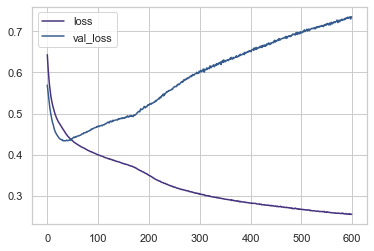

In [66]:
loss = pd.DataFrame(model.history.history)
loss.drop(['accuracy', 'val_accuracy'], axis=1).plot()

### Early Stopping to Prevent Overfitting

In [67]:
from tensorflow.keras.callbacks import EarlyStopping

In [68]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [69]:
model.fit(
x=x_train,
y=y_train,
epochs=600,
validation_data=(x_test, y_test),
verbose=1,
callbacks=[early_stop]
)

Epoch 1/600
17/17 [==============================] - 0s 4ms/step - loss: 0.2544 - accuracy: 0.8845 - val_loss: 0.7337 - val_accuracy: 0.7619
Epoch 2/600
17/17 [==============================] - 0s 2ms/step - loss: 0.2547 - accuracy: 0.8864 - val_loss: 0.7367 - val_accuracy: 0.7619
Epoch 3/600
17/17 [==============================] - 0s 2ms/step - loss: 0.2542 - accuracy: 0.8864 - val_loss: 0.7395 - val_accuracy: 0.7619
Epoch 4/600
17/17 [==============================] - 0s 2ms/step - loss: 0.2543 - accuracy: 0.8845 - val_loss: 0.7378 - val_accuracy: 0.7619
Epoch 5/600
17/17 [==============================] - 0s 2ms/step - loss: 0.2540 - accuracy: 0.8845 - val_loss: 0.7370 - val_accuracy: 0.7662
Epoch 6/600
17/17 [==============================] - 0s 2ms/step - loss: 0.2539 - accuracy: 0.8864 - val_loss: 0.7401 - val_accuracy: 0.7619
Epoch 7/600
17/17 [==============================] - 0s 2ms/step - loss: 0.2537 - accuracy: 0.8864 - val_loss: 0.7396 - val_accuracy: 0.7662
Epoch 8/600
1

<AxesSubplot:>

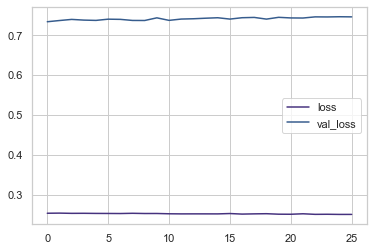

In [70]:
loss = pd.DataFrame(model.history.history)
loss.drop(['accuracy', 'val_accuracy'], axis=1).plot()

### Dropout to Reduce Overfitting

In [71]:
model = Sequential()
model.add(Dense(units=8,activation='relu'))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [72]:
model.fit(
x=x_train,
y=y_train,
epochs=600,
validation_data=(x_test, y_test),
verbose=1,
callbacks=[early_stop]
)

Epoch 1/600
17/17 [==============================] - 1s 9ms/step - loss: 0.7293 - accuracy: 0.4898 - val_loss: 0.6363 - val_accuracy: 0.7013
Epoch 2/600
17/17 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.5717 - val_loss: 0.6086 - val_accuracy: 0.7273
Epoch 3/600
17/17 [==============================] - 0s 2ms/step - loss: 0.6578 - accuracy: 0.5717 - val_loss: 0.5869 - val_accuracy: 0.7316
Epoch 4/600
17/17 [==============================] - 0s 2ms/step - loss: 0.6731 - accuracy: 0.5736 - val_loss: 0.5719 - val_accuracy: 0.7316
Epoch 5/600
17/17 [==============================] - 0s 2ms/step - loss: 0.6379 - accuracy: 0.5903 - val_loss: 0.5622 - val_accuracy: 0.7403
Epoch 6/600
17/17 [==============================] - 0s 2ms/step - loss: 0.6255 - accuracy: 0.6313 - val_loss: 0.5506 - val_accuracy: 0.7489
Epoch 7/600
17/17 [==============================] - 0s 2ms/step - loss: 0.6341 - accuracy: 0.6089 - val_loss: 0.5401 - val_accuracy: 0.7576
Epoch 8/600
1

Epoch 58/600
17/17 [==============================] - 0s 2ms/step - loss: 0.4808 - accuracy: 0.7579 - val_loss: 0.4472 - val_accuracy: 0.8009
Epoch 59/600
17/17 [==============================] - 0s 2ms/step - loss: 0.4781 - accuracy: 0.7654 - val_loss: 0.4456 - val_accuracy: 0.8052
Epoch 60/600
17/17 [==============================] - 0s 2ms/step - loss: 0.4915 - accuracy: 0.7486 - val_loss: 0.4455 - val_accuracy: 0.8052
Epoch 61/600
17/17 [==============================] - 0s 2ms/step - loss: 0.4665 - accuracy: 0.7672 - val_loss: 0.4455 - val_accuracy: 0.8009
Epoch 62/600
17/17 [==============================] - 0s 2ms/step - loss: 0.4755 - accuracy: 0.7672 - val_loss: 0.4458 - val_accuracy: 0.8052
Epoch 63/600
17/17 [==============================] - 0s 2ms/step - loss: 0.4912 - accuracy: 0.7467 - val_loss: 0.4448 - val_accuracy: 0.8009
Epoch 64/600
17/17 [==============================] - 0s 2ms/step - loss: 0.4809 - accuracy: 0.7337 - val_loss: 0.4435 - val_accuracy: 0.8095
Epoch 

17/17 [==============================] - 0s 2ms/step - loss: 0.4651 - accuracy: 0.7914 - val_loss: 0.4416 - val_accuracy: 0.8052
Epoch 115/600
17/17 [==============================] - 0s 2ms/step - loss: 0.4660 - accuracy: 0.7877 - val_loss: 0.4413 - val_accuracy: 0.8052
Epoch 116/600
17/17 [==============================] - 0s 2ms/step - loss: 0.4596 - accuracy: 0.7858 - val_loss: 0.4414 - val_accuracy: 0.8052
Epoch 117/600
17/17 [==============================] - 0s 3ms/step - loss: 0.4628 - accuracy: 0.7579 - val_loss: 0.4415 - val_accuracy: 0.8009
Epoch 118/600
17/17 [==============================] - 0s 2ms/step - loss: 0.4488 - accuracy: 0.7765 - val_loss: 0.4425 - val_accuracy: 0.8052
Epoch 119/600
17/17 [==============================] - 0s 2ms/step - loss: 0.4502 - accuracy: 0.7728 - val_loss: 0.4419 - val_accuracy: 0.8052
Epoch 120/600
17/17 [==============================] - 0s 2ms/step - loss: 0.4674 - accuracy: 0.7784 - val_loss: 0.4417 - val_accuracy: 0.8052
Epoch 121/600

<AxesSubplot:>

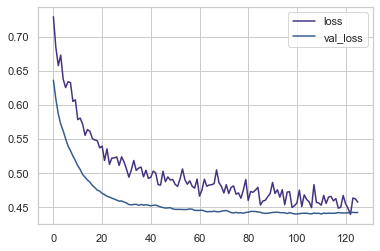

In [73]:
loss = pd.DataFrame(model.history.history)
loss.drop(['accuracy', 'val_accuracy'], axis=1).plot()

### Classification Report

In [74]:
predictions = model.predict(x_test)

predictions[0:10]

array([[0.8432177 ],
       [0.7059041 ],
       [0.00727937],
       [0.7815174 ],
       [0.38917735],
       [0.00887147],
       [0.04607812],
       [0.27196527],
       [0.45622042],
       [0.41391444]], dtype=float32)

In [75]:
predictions = model.predict(x_test)[:,0]
predictions[0:10]

array([0.8432177 , 0.7059041 , 0.00727937, 0.7815174 , 0.38917735,
       0.00887147, 0.04607812, 0.27196527, 0.45622042, 0.41391444],
      dtype=float32)

In [76]:
predictions = np.round(model.predict(x_test)[:,0])
predictions

array([1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [77]:
from sklearn.metrics import classification_report,confusion_matrix

In [78]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86       167
           1       0.62      0.64      0.63        64

    accuracy                           0.79       231
   macro avg       0.74      0.75      0.74       231
weighted avg       0.79      0.79      0.79       231



In [79]:
ann_accuracy = accuracy_score(y_test, predictions)
ann_accuracy

0.7922077922077922

# FINAL RESULT

                          Model     Score
7  Linear Discriminant Analysis  0.826840
0           Logistic Regression  0.822511
6                Grid search cv  0.805195
2                 Random Forest  0.796537
3       Support Vector Machines  0.796537
5                     Ann model  0.792208
4         K - Nearest Neighbors  0.787879
1                 Decision Tree  0.718615


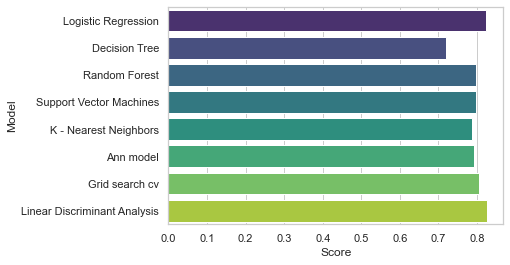

In [80]:
 models = pd.DataFrame({
    'Model': ['Logistic Regression','Decision Tree', 'Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors','Ann model', 'Grid search cv', 'Linear Discriminant Analysis'],
    'Score': [accuracy_logisticRegression, dtc_accuracy, rfc_accuracy, svc_accuracy, knn_accuracy,ann_accuracy, grid_accuracy, lda_accuracy]})

print(models.sort_values(by='Score', ascending=False))
sns.barplot(x = models['Score'], y = models['Model'], palette='viridis');